In [2]:
# Install required packages.
!pip install torch

import os
import torch
import numpy as np
from tqdm import tqdm 

os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

2.5.1


In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)


cpu


In [4]:
# import torch
# import pickle
# from torch_geometric.datasets import TUDataset

# from google.colab import drive
# drive.mount('/content/drive')
# FOLDERNAME = 'cse493g1/project/data'
# assert FOLDERNAME is not None, "[!] Enter the foldername."

# %cd drive/My\ Drive

# dataset_path = os.path.join(FOLDERNAME, 'solutions_dataset_gnn_graphs.pkl')
# with open(dataset_path, 'rb') as f:
#     dataset = pickle.load(f)

from construct_gnn_dataset import SolutionDataset

dataset = SolutionDataset(root='../../data/raw')

/Users/andy/workplace/code-classifier/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [5]:
print()
print(f'Dataset: {dataset}:')
print('====================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
# print(f'Number of classes: {dataset.num_classes}')



Dataset: SolutionDataset(50000):
Number of graphs: 50000
Number of features: 139


/Users/andy/workplace/code-classifier/.venv/lib/python3.9/site-packages/torch_geometric/utils/convert.py:278: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:281.)
  data_dict[key] = torch.as_tensor(value)


In [6]:
def printstats(index):
    data = dataset[index]  

    print()
    print(data)
    print('=============================================================')
    print(f'Number of nodes: {data.num_nodes}')
    print(f'Number of edges: {data.num_edges}')
    print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
    print(f'Has isolated nodes: {data.has_isolated_nodes()}')
    print(f'Has self-loops: {data.has_self_loops()}')
    print(f'Is undirected: {data.is_undirected()}')
    print('=============================================================')
    print(f'Data.x: {data.x}')
    print(f'Data.y: {data.y}')

    return (data.x, data.y)

In [7]:
x1, y1 = printstats(0)
x2, y2 = printstats(-1)


Data(edge_index=[2, 165], name=[166], cooccurrences=[166, 139], num_nodes=166, x=[166, 139], y=[100])
Number of nodes: 166
Number of edges: 165
Average node degree: 0.99
Has isolated nodes: False
Has self-loops: False
Is undirected: False
Data.x: tensor([[-0.1187, -0.1187, -0.1187,  ..., -0.1187, -0.1187, -0.1187],
        [-0.1707, -0.1707, -0.1707,  ..., -0.1707, -0.1707, -0.1707],
        [-0.1231, -0.1231, -0.1231,  ..., -0.1231, -0.1231, -0.1231],
        ...,
        [-0.1231, -0.1231, -0.1231,  ..., -0.1231, -0.1231, -0.1231],
        [-0.1515, -0.1515,  0.9832,  ...,  0.1190, -0.0980, -0.1515],
        [-0.1231, -0.1231, -0.1231,  ..., -0.1231, -0.1231, -0.1231]])
Data.y: tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [8]:
NODE_FEATURES = dataset.num_features
NUM_CLASSES = dataset[0].y.size(-1)

print(NODE_FEATURES)
print(NUM_CLASSES)


139
100


In [9]:
assert (len(dataset) % 10 == 0)
split = (len(dataset) * 9) // 10

train_dataset = [item for i, item in enumerate(dataset) if (i + 1) % 10 != 0]
test_dataset = [item for i, item in enumerate(dataset) if (i + 1) % 10 == 0]

print(f'Number of training graphs: {len(train_dataset)}')
print(f'Number of test graphs: {len(test_dataset)}')


Number of training graphs: 45000
Number of test graphs: 5000


In [10]:
from torch_geometric.loader import DataLoader

train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

for step, data in enumerate(train_loader):
    data = data.to(device)
    
    if (step) % 2500 == 0:
        print(f'Step {step}:')
        print('=======')
        print(f'Number of graphs in the current batch: {data.num_graphs}')
        print(data)
        print()

Step 0:
Number of graphs in the current batch: 1
DataBatch(edge_index=[2, 108], name=[1], cooccurrences=[109, 139], num_nodes=109, x=[109, 139], y=[100], batch=[109], ptr=[2])

Step 2500:
Number of graphs in the current batch: 1
DataBatch(edge_index=[2, 143], name=[1], cooccurrences=[144, 139], num_nodes=144, x=[144, 139], y=[100], batch=[144], ptr=[2])

Step 5000:
Number of graphs in the current batch: 1
DataBatch(edge_index=[2, 202], name=[1], cooccurrences=[203, 139], num_nodes=203, x=[203, 139], y=[100], batch=[203], ptr=[2])

Step 7500:
Number of graphs in the current batch: 1
DataBatch(edge_index=[2, 135], name=[1], cooccurrences=[136, 139], num_nodes=136, x=[136, 139], y=[100], batch=[136], ptr=[2])

Step 10000:
Number of graphs in the current batch: 1
DataBatch(edge_index=[2, 106], name=[1], cooccurrences=[107, 139], num_nodes=107, x=[107, 139], y=[100], batch=[107], ptr=[2])

Step 12500:
Number of graphs in the current batch: 1
DataBatch(edge_index=[2, 219], name=[1], cooccurr

## Training a Graph Neural Network (GNN)

Training a GNN for graph classification usually follows a simple recipe:

1. Embed each node by performing multiple rounds of message passing
2. Aggregate node embeddings into a unified graph embedding (**readout layer**)
3. Train a final classifier on the graph embedding

There exists multiple **readout layers** in literature, but the most common one is to simply take the average of node embeddings:

$$
\mathbf{x}_{\mathcal{G}} = \frac{1}{|\mathcal{V}|} \sum_{v \in \mathcal{V}} \mathcal{x}^{(L)}_v
$$

PyTorch Geometric provides this functionality via [`torch_geometric.nn.global_mean_pool`](https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.glob.global_mean_pool), which takes in the node embeddings of all nodes in the mini-batch and the assignment vector `batch` to compute a graph embedding of size `[batch_size, hidden_channels]` for each graph in the batch.

The final architecture for applying GNNs to the task of graph classification then looks as follows and allows for complete end-to-end training:

In [62]:
from torch.nn import Linear
import torch.nn.functional as F
from torch_geometric.nn import GCNConv
from torch_geometric.nn import global_mean_pool


class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GCN, self).__init__()
        self.conv1 = GCNConv(NODE_FEATURES, hidden_channels)
        self.lin = Linear(hidden_channels, NUM_CLASSES)

    def forward(self, x, edge_index, batch):
        x = self.conv1(x, edge_index)

        x = global_mean_pool(x, batch)  
        
        # x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin(x)
        return x


model = GCN(hidden_channels=200).to(device) 
print(model)

GCN(
  (conv1): GCNConv(139, 200)
  (lin): Linear(in_features=200, out_features=100, bias=True)
)


Here, we again make use of the [`GCNConv`](https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.conv.GCNConv) with $\mathrm{ReLU}(x) = \max(x, 0)$ activation for obtaining localized node embeddings, before we apply our final classifier on top of a graph readout layer.

Let's train our network for a few epochs to see how well it performs on the training as well as test set:

In [ ]:
EPOCHS = 30
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)
criterion = torch.nn.CrossEntropyLoss()

epoch_losses = {}
epoch_accuracies = {}

model.train()
for epoch in range(EPOCHS):
    epoch_loss = 0
    correct = 0
    total = 0
    
    for batch in tqdm(train_loader, desc=f"Epoch {epoch+1}/{EPOCHS} Progress"):
        batch = batch.to(device)
        optimizer.zero_grad()
        out = model(batch.x, batch.edge_index, batch.batch)
        yTrue = batch.y.float().reshape(1, NUM_CLASSES)
        loss = criterion(out, yTrue)
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
        max_idx = torch.argmax(out)
        predicted = torch.zeros_like(out)
        predicted[0][max_idx] = 1
        correct += 1 if (torch.equal(predicted, batch.y.float().reshape(1, NUM_CLASSES))) else 0
        total += 1
    
    epoch_accuracy = correct / total
    epoch_losses[epoch + 1] = epoch_loss
    epoch_accuracies[epoch + 1] = epoch_accuracy
    
    print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {epoch_loss:.4f}, Correct: {correct}, Total: {total}, Accuracy: {epoch_accuracy:.4f}")

print("Training completed.")


Epoch 1/8 Progress: 100%|██████████| 45000/45000 [00:44<00:00, 1003.43it/s]


Epoch 1/8, Loss: 634171.7247, Correct: 20877, Total: 45000, Accuracy: 0.4639


Epoch 2/8 Progress: 100%|██████████| 45000/45000 [00:46<00:00, 975.86it/s] 


Epoch 2/8, Loss: 753065.0829, Correct: 28742, Total: 45000, Accuracy: 0.6387


Epoch 3/8 Progress: 100%|██████████| 45000/45000 [00:46<00:00, 959.69it/s]


Epoch 3/8, Loss: 797090.3945, Correct: 31163, Total: 45000, Accuracy: 0.6925


Epoch 4/8 Progress: 100%|██████████| 45000/45000 [00:46<00:00, 967.43it/s]


Epoch 4/8, Loss: 821945.8514, Correct: 32353, Total: 45000, Accuracy: 0.7190


Epoch 5/8 Progress: 100%|██████████| 45000/45000 [00:46<00:00, 969.49it/s]


Epoch 5/8, Loss: 840984.4363, Correct: 33073, Total: 45000, Accuracy: 0.7350


Epoch 6/8 Progress: 100%|██████████| 45000/45000 [00:46<00:00, 962.55it/s]


Epoch 6/8, Loss: 875110.9521, Correct: 33667, Total: 45000, Accuracy: 0.7482


Epoch 7/8 Progress: 100%|██████████| 45000/45000 [00:47<00:00, 941.18it/s]


Epoch 7/8, Loss: 875087.5531, Correct: 34125, Total: 45000, Accuracy: 0.7583


Epoch 8/8 Progress: 100%|██████████| 45000/45000 [00:46<00:00, 961.25it/s]

Epoch 8/8, Loss: 895290.5452, Correct: 34385, Total: 45000, Accuracy: 0.7641
Training completed.


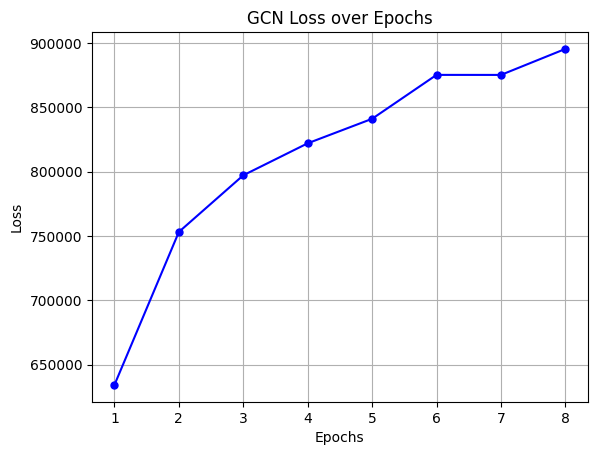

In [57]:
import matplotlib.pyplot as plt

epochs = list(epoch_losses.keys())
losses = list(epoch_losses.values())

plt.plot(epochs, losses, marker='o', color='b', linestyle='-', markersize=5)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('GCN Loss over Epochs')
plt.grid(True)
plt.show()

In [58]:
MODEL_PATH = "GCNModel.pth"

In [59]:
torch.save(model, MODEL_PATH)

In [60]:
loaded_model = torch.load(MODEL_PATH)
loaded_model.eval()

/var/folders/qj/2t6cj_5121l_30dkf9rwfbvw0000gn/T/ipykernel_50626/1538415150.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model = torch.load(MODEL_PATH)


GCN(
  (conv1): GCNConv(139, 256)
  (lin): Linear(in_features=256, out_features=100, bias=True)
)

In [61]:
def test(model, test_loader):
    model.eval()  # Set model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():
        for batch in tqdm(test_loader, desc="Testing Progress"):
            batch = batch.to(device)
            out = model(batch.x, batch.edge_index, batch.batch)  
            max_idx = torch.argmax(out)
            predicted = torch.zeros_like(out)
            predicted[0][max_idx] = 1
            correct += 1 if (torch.equal(predicted, batch.y.float().reshape(1, NUM_CLASSES))) else 0
            total += 1
    
    return correct, total, correct / total

correct, total, test_accuracy = test(loaded_model, test_loader)
print(f"Test Accuracy: {test_accuracy * 100:.2f}% ({correct}/{total})")

Testing Progress: 100%|██████████| 5000/5000 [00:02<00:00, 1692.27it/s]

Test Accuracy: 77.04% (3852/5000)
